<a href="https://colab.research.google.com/github/haowenjiang1118/AI_cert_project/blob/main/module5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [50]:
'''
from google.colab import drive
drive.mount('/content/drive/')

import os
os.chdir('drive/MyDrive/module5_cert')
'''

"\nfrom google.colab import drive\ndrive.mount('/content/drive/')\n\nimport os\nos.chdir('drive/MyDrive/module5_cert')\n"

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [4]:
data = pd.read_csv('data/coupons.csv')

In [7]:
print(data.head())
print(data.shape)

       destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender age      maritalStatus  ...  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1           Coffee House         2h  Female  21  Unmarried partner  ...   
2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
3           Coffee House         2h  Female  21  Unmarried partner  ...   
4           Coffee House         1d  Female  21  Unmarried partner  ...   

   CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0        never       NaN                  4~8              1~3   
1        never       NaN                  4~8           

2. Investigate the dataset for missing or problematic data.

In [8]:
data.isna().sum()
# we can see that the missing columns:
# car are mostly missing
# Bar/CoffeeHouse are missing a bit
# Carryway are missing a bit
# RestaurantLessThan20/Restaurant20To50 are missing a bit

,0
destination,0
passanger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


3. Decide what to do about your missing data -- drop, replace, other...

In [9]:
# drop rows with missing restaurant info
data = data.dropna(subset=['Restaurant20To50','RestaurantLessThan20'])
# check max unique value of bar  and fill the Bar columns
most_option_Bar = data['Bar'].value_counts().sort_values(ascending=False).index[0]
print(f"most selection of Bar: {most_option_Bar}")
data['Bar'] = data['Bar'].fillna(most_option_Bar)

# check max unique value of CoffeeHouse and fill the CoffeeHouse columns
most_option_CoffeeHouse = data['CoffeeHouse'].value_counts().sort_values(ascending=False).index[0]
print(f"most selection of CoffeeHouse: {most_option_CoffeeHouse}")
data['CoffeeHouse'] = data['CoffeeHouse'].fillna(most_option_CoffeeHouse)

# check max unique value of CarryAway and fill it
most_option_CarryAway = data['CarryAway'].value_counts().sort_values(ascending=False).index[0]
print(f'most selection of CarryAway: {most_option_CarryAway}')
data['CarryAway'] = data['CarryAway'].fillna(most_option_CarryAway)

# drop the car column since is not informational
if 'car' in data.columns:
  data.drop('car',axis=1,inplace=True)

# check if there is still any columns that have na value
data.isna().sum()




most selection of Bar: never
most selection of CoffeeHouse: less1
most selection of CarryAway: 1~3


<ipython-input-9-e4642a58bd31>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Bar'] = data['Bar'].fillna(most_option_Bar)
<ipython-input-9-e4642a58bd31>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CoffeeHouse'] = data['CoffeeHouse'].fillna(most_option_CoffeeHouse)
<ipython-input-9-e4642a58bd31>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

,0
destination,0
passanger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


4. What proportion of the total observations chose to accept the coupon?



In [197]:
prop_coup = data.query('Y == 1')['Y'].count() / data.shape[0]
print(prop_coup)

# about 56.78% of the total observations will accept it.

0.5678246151366164


5. Use a bar plot to visualize the `coupon` column.

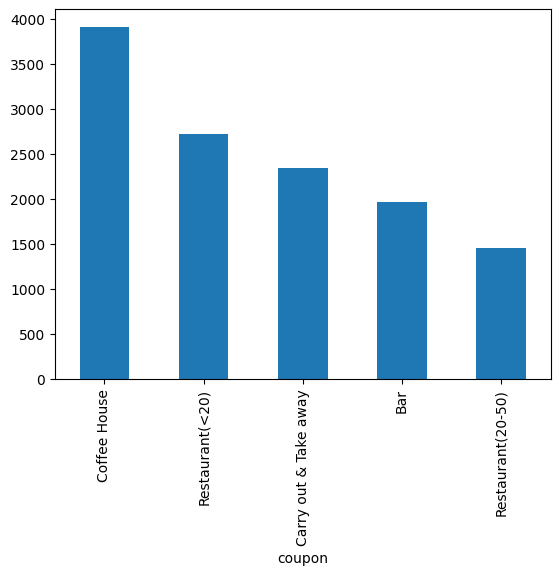

In [198]:
coupon_dist = data['coupon'].value_counts()
coupon_dist.plot(kind='bar')
plt.savefig('image/bar_coupon.png')
# from the bar plot we can tell Coffee House coupons are the most general

6. Use a histogram to visualize the temperature column.

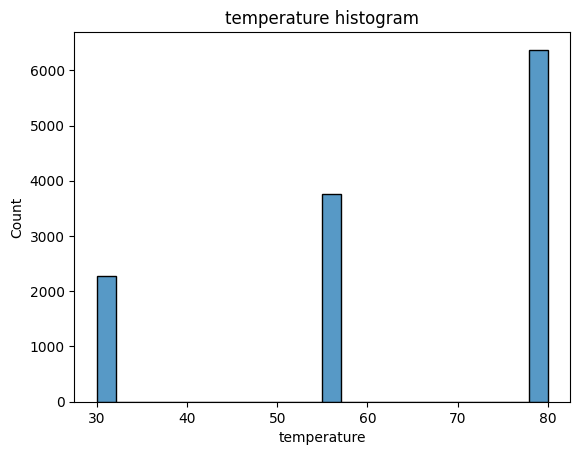

In [199]:
sns.histplot(data=data, x='temperature')
plt.title('temperature histogram')
plt.savefig('image/hist_temp.png')
# from the hist plot, weknow that more records are located at high temperature 80.

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [200]:
data_bar = data.loc[data['coupon'] == 'Bar']
data_bar.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [201]:
prop_accepted_BarCoupons = data_bar.query('Y==1')['Y'].count() / data_bar.shape[0]
print(prop_accepted_BarCoupons)

0.4107778342653787


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


proportion of acceptance less or equal than 3: 0.37047511312217196
proportion of accpetance greater than3: 0.7688442211055276


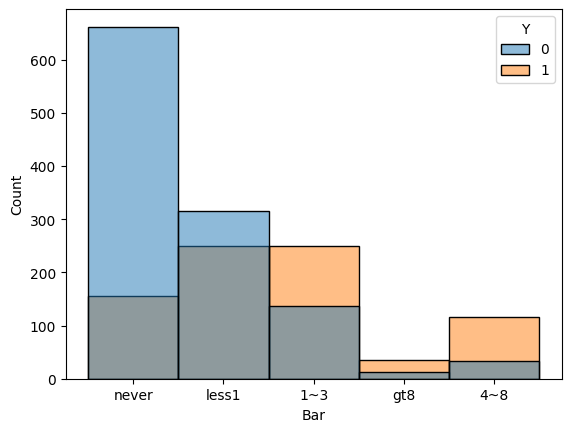

In [202]:
le3 = ['never','less1','1~3']
gt3 = ['gt8','4~8']
prop_accepted_BarCoupons_le3 = data_bar.query(f'Bar in {le3} and Y==1')['Y'].count() / data_bar.query(f'Bar in {le3}')['Y'].count()
prop_accepted_BarCoupons_gt3 = data_bar.query(f'Bar in {gt3} and Y==1')['Y'].count() / data_bar.query(f'Bar in {gt3}')['Y'].count()
print(f'proportion of acceptance less or equal than 3: {prop_accepted_BarCoupons_le3}')
print(f'proportion of accpetance greater than3: {prop_accepted_BarCoupons_gt3}')
sns.histplot(data=data_bar,x='Bar',hue='Y')
plt.savefig('image/hist_Bar_withHue_q3.png')
# from the numeric percentage and the graph,it indicates that
# people who go more often to the bar will be much more likely to accept the coupon
# people that have gone at least one time to the bar will be more likely to give it another try and accpet the coupon
# people that has never gone to the bar would barely accept the coupon

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [203]:
gt1 = ['1~3','gt8','4~8']
data_bar['age'] = pd.to_numeric(data_bar['age'], errors='coerce')
accept_bargt1_agegt25 = data_bar.query(f'Bar in {gt1} and age > 25 and Y==1')['Y'].count() / data_bar.query(f'Bar in {gt1} and age > 25')['Y'].count()
accept_bargt1 = data_bar.query(f'Bar in {gt1} and Y==1')['Y'].count() / data_bar.query(f'Bar in {gt1}')['Y'].count()
print(f"acceptance rate for people going to bar more than once and over 25: {accept_bargt1_agegt25}")
print(f'acceptance rate for people going to bar more than once: {accept_bargt1}')

# as the numeric rate suggests,
# people that have gone to the bar before will be more likely to accept the coupon
# people that are over 29 will be more likely to accept the coupon
# the rate has grown a lot to people that have Bar experience.
# however, there is only a slight increase in likelihood when it's related to age

acceptance rate for people going to bar more than once and over 25: 0.6965317919075145
acceptance rate for people going to bar more than once: 0.6888888888888889


<ipython-input-203-fd9086eaeab5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bar['age'] = pd.to_numeric(data_bar['age'], errors='coerce')


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [204]:
gt1 = ['1~3','gt8','4~8']
print(data_bar['passanger'].unique())
print(data_bar['occupation'].unique())
data_bar_q5 = data_bar.query(f'passanger != "Kid(s)" and Bar in {gt1} and occupation != "Farming Fishing & Forestry"')
accept_rate_q5 = data_bar_q5.query('Y==1')['Y'].count() / data_bar_q5.shape[0]
print(accept_rate_q5)
# in this example, we can see conditional if the driver doesn't take a kid
# and is not in the farming Fishing & froestry occupation would be more likely
# to aceept the coupon

['Kid(s)' 'Alone' 'Friend(s)' 'Partner']
['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social Services' 'Office & Administrative Support'
 'Construction & Extraction' 'Legal' 'Retired'
 'Installation Maintenance & Repair' 'Transportation & Material Moving'
 'Business & Financial' 'Protective Service'
 'Food Preparation & Serving Related' 'Production Occupations'
 'Building & Grounds Cleaning & Maintenance' 'Farming Fishing & Forestry']
0.7134935304990758


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [206]:
print(data_bar['maritalStatus'].unique())
print(data_bar['income'].unique())
print(data_bar['RestaurantLessThan20'].unique())
income_lt5 = ['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999']
rest_gt4 = ['4~8','gt8']
data_bar_q6_1 = data_bar.query(f'Bar in {gt1} and passanger != "Kid(s)" and maritalStatus != "Widowed"')
data_bar_q6_2 = data_bar.query(f'Bar in {gt1} and age < 30')
data_bar_q6_3 = data_bar.query(f'RestaurantLessThan20 in {rest_gt4} and income in {income_lt5}')
accept_rate_q1 = data_bar_q6_1.query('Y==1')['Y'].count() / data_bar_q6_1.shape[0]
accept_rate_q2 = data_bar_q6_2.query('Y==1')['Y'].count() / data_bar_q6_2.shape[0]
accept_rate_q3 = data_bar_q6_3.query('Y==1')['Y'].count() / data_bar_q6_3.shape[0]
print(accept_rate_q1)
print(accept_rate_q2)
print(accept_rate_q3)
# From the numeric data, we can conclude:
# Marital proably won't be a facotr to affect likelyhood to accept the coupon
# Young people would be more likely to accept the bar coupon
# Income would be one of the key paramaters that affect people's decision to accept coupon

['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
['$37500 - $49999' '$62500 - $74999' '$12500 - $24999' '$75000 - $87499'
 '$50000 - $62499' '$25000 - $37499' '$100000 or More' '$87500 - $99999'
 'Less than $12500']
['4~8' '1~3' 'less1' 'gt8' 'never']
0.7134935304990758
0.7339449541284404
0.45161290322580644


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [207]:
# The majority group of drivers who accept the coupon who be those
# 1. people that have gone to the Bar at least once
# 2. people with relatively high income
# 3. people that drive without a kid
# 4. people that are younger

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [14]:
#select coffeeshop coupon data as my research data
data_coffee = data.loc[data['coupon'] == 'Coffee House']
data_coffee.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0


In [15]:
#check the acceptance rate of this coupon
prop_coffee = data_coffee.query('Y==1')['Y'].count() / data_coffee.shape[0]
print(prop_coffee)

0.4976993865030675


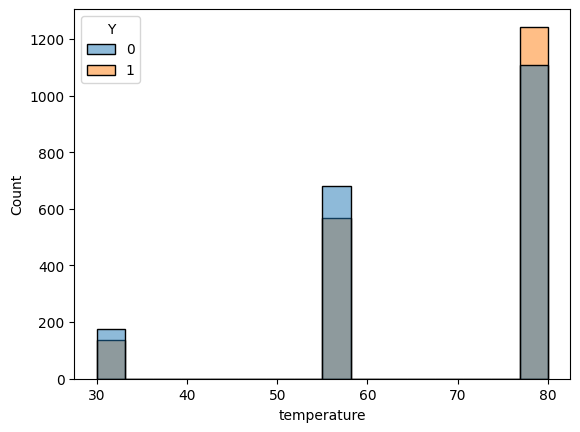

In [16]:
#check the acceptance rate against temperature
sns.histplot(data=data_coffee,x='temperature',hue='Y')
plt.savefig('image/hist_temp_withHue_coffeeshop.png')

# from the graph we clearly can induct that as the temperature grows hotter, people are more
# eager to accept the coffee coupon.

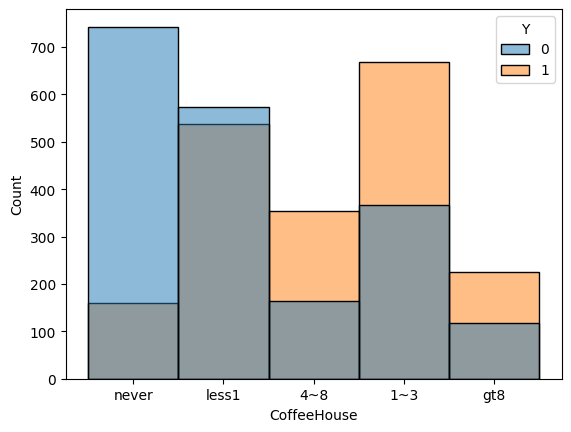

In [17]:
# histgram of distribution of #of times going to coffee shop
sns.histplot(data=data_coffee,x='CoffeeHouse',hue='Y')
plt.savefig('image/hist_CoffeeHouse_withHue_coffeeshop.png')

# from the plot, we can see those who go to coffee shop greater or equal than once
# are more likely to accept the coupon

In [18]:
# calculate on acceptance rate of people going to coffeeshop greater or equal than once
gt1_coffee = ['1~3','4~8','gt8']
data_coffee_gt1 = data_coffee.query(f'CoffeeHouse in {gt1_coffee}')
accept_rate_coffee_gt1 = data_coffee_gt1.query('Y==1')['Y'].count() / data_coffee_gt1.shape[0]
print(accept_rate_coffee_gt1)
# the numeric data that the rate increases about 15% proves our observation of the graph above

0.6580611169652265


In [25]:
# calculate the rate of the people that go to the coffeeshop gt1 with each temperature
gt1_coffee_temp = data_coffee_gt1.groupby('temperature')['Y'].count()
gt1_coffee_temp_accept = data_coffee_gt1.query('Y==1').groupby('temperature')['Y'].count()
print(gt1_coffee_temp_accept/gt1_coffee_temp)

# from the numeric data, we can see both temp 30 and 55 have probability less than the gt1 average.
# However, it strictly increases with temperature getting higher, and a large distributions of
# coupon acceptors are in the 80 range.


temperature
30    0.541935
55    0.585484
80    0.714159
Name: Y, dtype: float64


<ipython-input-48-8d47ed969eb3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_coffee_gt1['age'] = pd.to_numeric(data_coffee['age'], errors='coerce')


0.6124031007751938


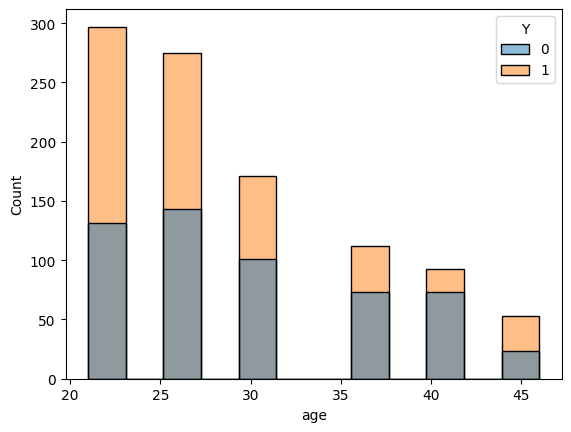

In [48]:
# caculate the rate of gt1 with people getting employed and age over 27
data_coffee_gt1['age'] = pd.to_numeric(data_coffee['age'], errors='coerce')
gt1_ageover25_employed = data_coffee_gt1.query('age > 27 and occupation != "Unemployed"')
rate_gt1_ageover25_employed = gt1_ageover25_employed.query('Y==1')['Y'].count() / gt1_ageover25_employed.shape[0]
print(rate_gt1_ageover25_employed)
sns.histplot(data=data_coffee_gt1,x='age',hue='Y')
plt.savefig('image/hist_age_withHue_coffeeshop.png')
# From the numeric data above, we can see that there is a drop in the acceptance rate,
# this indicates that younger people who are unemployed would be more likely to be the coupon users

In [49]:
# Conclusion
# From the case above, we can conclude the conditions customers that would accept the coupons are:
# 1. when the temperature of the day is relatively high
# 2. people who have a habit of going to coffee shop to drink coffee at least once a week
# 3. people whose age is younger and who is currently unemployed